#Cardiotocography

## Objective: To classify Cardiotocography dataset 10-class and 3-class problems, respectively. To experiment the influence of strategies such as,
1. Feature Scaling
2. Feature Selection
3. Splitting of dataset and random seeds
4. Cross validation

#Dataset:
2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified by three expert obstetricians and a consensus classification label assigned to each of them. Classification was both with respect to a morphologic pattern (A, B, C. …) and to a fetal state (N, S, P). Therefore, the dataset can be used either for 10-class or 3-class experiments.

# Attribute Information:
1.	LB - FHR baseline (beats per minute)
2.	AC - # of accelerations per second
3.	FM - # of fetal movements per second
4.	UC - # of uterine contractions per second
5.	DL - # of light decelerations per second
6.	DS - # of severe decelerations per second
7.	DP - # of prolongued decelerations per second
8.	ASTV - percentage of time with abnormal short term variability
9.	MSTV - mean value of short term variability
10.	ALTV - percentage of time with abnormal long term variability
11.	MLTV - mean value of long term variability
12.	Width - width of FHR histogram
13.	Min - minimum of FHR histogram
14.	Max - Maximum of FHR histogram
15.	Nmax - # of histogram peaks
16.	Nzeros - # of histogram zeros
17.	Mode - histogram mode
18.	Mean - histogram mean
19.	Median - histogram median
20.	Variance - histogram variance
21.	Tendency - histogram tendency

#Target classes
CLASS - FHR pattern class code (1 to 10)
NSP - fetal state class code (N=normal; S=suspect; P=pathologic)

#Source:
https://archive.ics.uci.edu/ml/datasets/Cardiotocography

#Tasks:
##Task 1: Take class (1 to 10) as a target class.  
a.	Load the dataset
b.	Shuffles the rows of the dataset
c.	Apply pre-processing techniques (if required)
d.	Take X [independent features] =data[1: 21] and Y= CLASS - FHR pattern class code (1 to 10)
e.	Divide the dataset into training (70%) and testing (30%) fractions
f.	Apply logistic regression variants and variants of tree/forest-based classification models (implemented so far in Labs). Note: Minimum four models will be implemented.
g.	Evaluate and store the respective training and testing accuracy values
h.	Plot two boxplots for training and testing accuracy, respectively, by considering all the models. Note that use only single boxplot to show the performance of every model i.e., in total two boxplots one for training and one for testing. 
i. Print all the classification measures supported by sklearn
j.	Concludes the results 

Perform the following tasks to find influence of different strategies (Use above tasks from a to j)

1. Compute model results with and without feature scaling and see which models work well even without scaling
2. Perform different feature selection stragies using correlation analysis, forward selection, backward elimination, recursive feature elimination etc. Find minimal and best possible subset of features from each method.
3. Split the dataset into different splits such as 90-10, 80-20, 70-30... 10-90. Find best split size which gives good accuracy for both training and testing.
4. Split the dataset with different random state values and experiment the models. Find whether there is any influence of random state value and experiment.
4. Perform classification with k-fold cross validation. Experiment with different k values and find what is their influence.

##Task 2: Take fetal state as a target class.
a.	Load the dataset
b.	Shuffles the rows of the dataset
c.	Apply pre-processing techniques (if required)
d.	Take X [independent features] =data[1: 21] and Y= NSP - fetal state class code (N=normal; S=suspect; P=pathologic)
e.	Divide the dataset into training (70%) and testing (30%) fractions
f.	Apply logistic regression variants and variants of tree/forest-based classification models (implemented so far in Labs). Note: Minimum for models will be implemented.
g.	Evaluate and store the respective training and testing accuracy values. 
h.	Plot two boxplots for training and testing accuracy, respectively, by considering all the models. Note that use only single boxplot to show the performance of every model i.e., in total two boxplots one for training and one for testing.  
i. Print all the classification measures supported by sklearn
j.	Concludes the results 

Perform the following tasks to find influence of different strategies (Use above tasks from a to j)

1. Compute model results with and without feature scaling and see which models work well even without scaling
2. Perform different feature selection stragies using correlation analysis, forward selection, backward elimination, recursive feature elimination etc. Find minimal and best possible subset of features from each method.
3. Split the dataset into different splits such as 90-10, 80-20, 70-30... 10-90. Find best split size which gives good accuracy for both training and testing.
4. Split the dataset with different random state values and experiment the models. Find whether there is any influence of random state value and experiment.
4. Perform classification with k-fold cross validation. Experiment with different k values and find what is their influence.

#Helping links:
https://www.tutorialspoint.com/python_data_science/python_box_plots.htm#:~:text=Advertisements,quartile%20in%20the%20data%20set.
https://seaborn.pydata.org/generated/seaborn.boxplot.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
https://python-graph-gallery.com/boxplot/
https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html




## Task 1: Take class (1 to 10) as a target class. 

In [39]:
# Load the libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset 
# Shuffle the dataset

data = pd.read_excel('CTG.xls', 1, skiprows = 1)
cols = ["LB", "AC", "FM", "UC", "DL", "DS", "DP", "ASTV", "MSTV", "ALTV", "MLTV", "Min", "Max", "Nmax", "Nzeros", "Mode", "Mean", "Median", "Variance", "Tendency", "CLASS", "NSP"]
data= data[cols]
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.5,43.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0,2.0
1,132.0,4.0,0.0,4.0,2.0,0.0,0.0,17.0,2.1,0.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0,1.0
2,133.0,2.0,0.0,5.0,2.0,0.0,0.0,16.0,2.1,0.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0,1.0
3,134.0,2.0,0.0,6.0,2.0,0.0,0.0,16.0,2.4,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0,1.0
4,132.0,4.0,0.0,5.0,0.0,0.0,0.0,16.0,2.4,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2.0,1.0


In [3]:
data.shape

(2129, 22)

In [4]:
# Preprocessing
# Encoding categorical variables (if any)
# Feature Scaling
# Filling missing values (if any)

# we can observe that there are very less number of nan values
# so we can easily drop them
data.isna().sum()

LB          3
AC          3
FM          2
UC          2
DL          1
DS          1
DP          1
ASTV        2
MSTV        2
ALTV        2
MLTV        2
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
CLASS       3
NSP         3
dtype: int64

In [5]:
# dropping the nan values
data.dropna(inplace = True)

In [6]:
# sanity check
data.isna().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
CLASS       0
NSP         0
dtype: int64

In [7]:
data['CLASS'].unique()

array([ 9.,  6.,  2.,  8., 10.,  7.,  1.,  3.,  5.,  4.])

In [8]:
data['NSP'].unique()

array([2., 1., 3.])

In [9]:
# we can observe different scale of values
data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,2.722484,7.241298,3.659925,1.570085,0.003293,0.126058,46.990122,1.332785,9.84666,...,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,4.509878,1.304327
std,9.840844,3.560850,37.125309,2.847094,2.499229,0.057300,0.464361,17.192814,0.883241,18.39688,...,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,3.026883,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000,1.000000
25%,126.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,2.000000,1.000000
50%,133.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,4.000000,1.000000
75%,140.000000,4.000000,2.000000,5.000000,3.000000,0.000000,0.000000,61.000000,1.700000,11.00000,...,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,7.000000,1.000000
max,160.000000,26.000000,564.000000,23.000000,16.000000,1.000000,4.000000,87.000000,7.000000,91.00000,...,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,10.000000,3.000000


In [10]:
cols

['LB',
 'AC',
 'FM',
 'UC',
 'DL',
 'DS',
 'DP',
 'ASTV',
 'MSTV',
 'ALTV',
 'MLTV',
 'Min',
 'Max',
 'Nmax',
 'Nzeros',
 'Mode',
 'Mean',
 'Median',
 'Variance',
 'Tendency',
 'CLASS',
 'NSP']

In [11]:
train_cols = cols[:-2]
print(train_cols)

['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency']


In [12]:
# scaling the values, to avoid negative values we ll make use of MinMax scaler
scaler = MinMaxScaler()
data[train_cols] = scaler.fit_transform(data[train_cols])

In [13]:
# sanity check
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,0.259259,0.000000,0.0,0.000000,0.000,0.0,0.0,0.813333,0.044118,0.472527,...,0.034483,0.111111,0.0,0.472441,0.587156,0.403670,0.271375,1.0,9.0,2.0
1,0.481481,0.153846,0.0,0.173913,0.125,0.0,0.0,0.066667,0.279412,0.000000,...,0.655172,0.333333,0.1,0.637795,0.577982,0.577982,0.044610,0.5,6.0,1.0
2,0.500000,0.076923,0.0,0.217391,0.125,0.0,0.0,0.053333,0.279412,0.000000,...,0.655172,0.277778,0.1,0.637795,0.568807,0.559633,0.048327,0.5,6.0,1.0
3,0.518519,0.076923,0.0,0.260870,0.125,0.0,0.0,0.053333,0.323529,0.000000,...,0.413793,0.611111,0.0,0.606299,0.559633,0.550459,0.048327,1.0,6.0,1.0
4,0.481481,0.153846,0.0,0.217391,0.000,0.0,0.0,0.053333,0.323529,0.000000,...,0.413793,0.500000,0.0,0.606299,0.577982,0.559633,0.040892,1.0,2.0,1.0


In [14]:
data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,0.505627,0.104711,0.012839,0.159127,0.098130,0.003293,0.031515,0.466535,0.166586,0.108205,...,0.362288,0.226011,0.032361,0.609858,0.565234,0.560462,0.069919,0.660160,4.509878,1.304327
std,0.182238,0.136956,0.065825,0.123787,0.156202,0.057300,0.116090,0.229238,0.129888,0.202164,...,0.154691,0.163855,0.070606,0.128987,0.143061,0.132721,0.107724,0.305414,3.026883,0.614377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.370370,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.266667,0.073529,0.000000,...,0.258621,0.111111,0.000000,0.543307,0.477064,0.477064,0.007435,0.500000,2.000000,1.000000
50%,0.500000,0.038462,0.000000,0.130435,0.000000,0.000000,0.000000,0.493333,0.147059,0.000000,...,0.344828,0.166667,0.000000,0.622047,0.577982,0.568807,0.026022,0.500000,4.000000,1.000000
75%,0.629630,0.153846,0.003546,0.217391,0.187500,0.000000,0.000000,0.653333,0.220588,0.120879,...,0.448276,0.333333,0.000000,0.692913,0.660550,0.651376,0.089219,1.000000,7.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,3.000000


In [15]:
X = data.drop(columns = ['CLASS', 'NSP'], axis = 1)
y = data["CLASS"] # FHR code ie. 10 class classification
print("X shape : ", X.shape)
print("y shape : ", y.shape)

X shape :  (2126, 20)
y shape :  (2126,)


In [16]:
# Divide the dataset to training and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 1)

In [17]:
print("X train shape : ", X_train.shape)
print("y train shape : ", y_train.shape)
print("X test shape : ", X_test.shape)
print("y test shape : ", y_test.shape)

X train shape :  (1488, 20)
y train shape :  (1488,)
X test shape :  (638, 20)
y test shape :  (638,)


In [18]:
# data is randomly shuffled
X_train.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
1178,0.370370,0.115385,0.000000,0.130435,0.0000,0.0,0.0,0.173333,0.176471,0.000000,0.124260,0.522936,0.284483,0.111111,0.0,0.574803,0.568807,0.532110,0.033457,0.5
408,0.814815,0.000000,0.000000,0.000000,0.0625,0.0,0.0,0.853333,0.000000,0.472527,0.102564,0.669725,0.310345,0.055556,0.0,0.740157,0.733945,0.715596,0.003717,1.0
802,0.740741,0.000000,0.000000,0.217391,0.0000,0.0,0.0,0.706667,0.029412,0.362637,0.145957,0.770642,0.362069,0.055556,0.0,0.708661,0.697248,0.678899,0.003717,0.5
22,0.407407,0.000000,0.388298,0.086957,0.1250,0.0,0.5,0.293333,0.338235,0.000000,0.078895,0.036697,0.663793,0.611111,0.1,0.118110,0.238532,0.229358,0.550186,0.0
204,0.259259,0.000000,0.005319,0.000000,0.0000,0.0,0.0,0.520000,0.073529,0.164835,0.145957,0.541284,0.068966,0.055556,0.1,0.496063,0.440367,0.422018,0.000000,0.5


In [31]:
# Implement logistic regression variants and variants of tree/forest-based classification models (implemented so far in Labs). Note: Minimum 4 models will be implemented.
# Not all models can be obtained from sklearn 

model_1 = LogisticRegression(max_iter = 2000)
model_2 = DecisionTreeClassifier()
model_3 = RandomForestClassifier()
model_4 = AdaBoostClassifier()

In [32]:
# Train and test the models

model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)
model_4.fit(X_train, y_train)

AdaBoostClassifier()

In [33]:
# Build training accuracy boxplot analysis
model_1_p_train = model_1.predict(X_train)
model_1_p_test = model_1.predict(X_test)

model_2_p_train = model_2.predict(X_train)
model_2_p_test = model_2.predict(X_test)

model_3_p_train = model_3.predict(X_train)
model_3_p_test = model_3.predict(X_test)

model_4_p_train = model_4.predict(X_train)
model_4_p_test = model_4.predict(X_test)

In [35]:
model_1_acc_train = accuracy_score(y_train, model_1_p_train)
model_1_acc_test = accuracy_score(y_test, model_1_p_test)

model_2_acc_train = accuracy_score(y_train, model_2_p_train)
model_2_acc_test = accuracy_score(y_test, model_2_p_test)

model_3_acc_train = accuracy_score(y_train, model_3_p_train)
model_3_acc_test = accuracy_score(y_test, model_3_p_test)

model_4_acc_train = accuracy_score(y_train, model_4_p_train)
model_4_acc_test = accuracy_score(y_test, model_4_p_test)

In [38]:
box = pd.DataFrame({'Training accuracy' : [model_1_acc_train, model_2_acc_train, model_3_acc_train, model_4_acc_train],
                          'Testing accuracy' : [model_1_acc_test, model_2_acc_test, model_3_acc_test, model_4_acc_test]})
box['models'] = ["Logistic Regression", "Decision Tree", "Random Forest", "AdaBosst"]

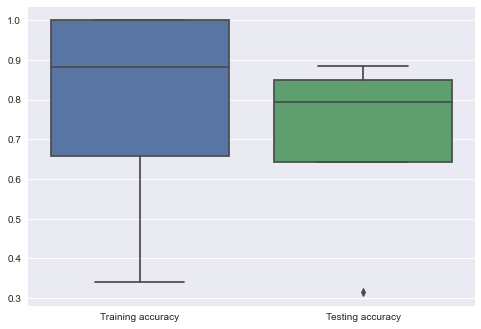

In [40]:
# Build testing accuracy boxplot analysis 
plt.style.use('seaborn')
sns.boxplot(data = box, hue_order = "models")

## Task 2: Take fetal state as a target class.

In [41]:
# Use the preprocessed dataset here
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,0.259259,0.000000,0.0,0.000000,0.000,0.0,0.0,0.813333,0.044118,0.472527,...,0.034483,0.111111,0.0,0.472441,0.587156,0.403670,0.271375,1.0,9.0,2.0
1,0.481481,0.153846,0.0,0.173913,0.125,0.0,0.0,0.066667,0.279412,0.000000,...,0.655172,0.333333,0.1,0.637795,0.577982,0.577982,0.044610,0.5,6.0,1.0
2,0.500000,0.076923,0.0,0.217391,0.125,0.0,0.0,0.053333,0.279412,0.000000,...,0.655172,0.277778,0.1,0.637795,0.568807,0.559633,0.048327,0.5,6.0,1.0
3,0.518519,0.076923,0.0,0.260870,0.125,0.0,0.0,0.053333,0.323529,0.000000,...,0.413793,0.611111,0.0,0.606299,0.559633,0.550459,0.048327,1.0,6.0,1.0
4,0.481481,0.153846,0.0,0.217391,0.000,0.0,0.0,0.053333,0.323529,0.000000,...,0.413793,0.500000,0.0,0.606299,0.577982,0.559633,0.040892,1.0,2.0,1.0


In [43]:
X = data.drop(columns = ['CLASS', 'NSP'], axis = 1)
y = data["NSP"] # this time we will be using NSP ie. # class classification
print("X shape : ", X.shape)
print("y shape : ", y.shape)

X shape :  (2126, 20)
y shape :  (2126,)


In [44]:
# Divide the dataset to training and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 1)

In [45]:
print("X train shape : ", X_train.shape)
print("y train shape : ", y_train.shape)
print("X test shape : ", X_test.shape)
print("y test shape : ", y_test.shape)

X train shape :  (1488, 20)
y train shape :  (1488,)
X test shape :  (638, 20)
y test shape :  (638,)


In [46]:
# Implement logistic regression variants and variants of tree/forest-based classification models (implemented so far in Labs). Note: Minimum 4 models will be implemented.
# Not all models can be obtained from sklearn 

model_1 = LogisticRegression(max_iter = 2000)
model_2 = DecisionTreeClassifier()
model_3 = RandomForestClassifier()
model_4 = AdaBoostClassifier()

In [47]:
# Train and test the models

model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)
model_4.fit(X_train, y_train)

AdaBoostClassifier()

In [48]:
# Build training accuracy boxplot analysis
model_1_p_train = model_1.predict(X_train)
model_1_p_test = model_1.predict(X_test)

model_2_p_train = model_2.predict(X_train)
model_2_p_test = model_2.predict(X_test)

model_3_p_train = model_3.predict(X_train)
model_3_p_test = model_3.predict(X_test)

model_4_p_train = model_4.predict(X_train)
model_4_p_test = model_4.predict(X_test)

In [49]:
model_1_acc_train = accuracy_score(y_train, model_1_p_train)
model_1_acc_test = accuracy_score(y_test, model_1_p_test)

model_2_acc_train = accuracy_score(y_train, model_2_p_train)
model_2_acc_test = accuracy_score(y_test, model_2_p_test)

model_3_acc_train = accuracy_score(y_train, model_3_p_train)
model_3_acc_test = accuracy_score(y_test, model_3_p_test)

model_4_acc_train = accuracy_score(y_train, model_4_p_train)
model_4_acc_test = accuracy_score(y_test, model_4_p_test)

In [50]:
box = pd.DataFrame({'Training accuracy' : [model_1_acc_train, model_2_acc_train, model_3_acc_train, model_4_acc_train],
                          'Testing accuracy' : [model_1_acc_test, model_2_acc_test, model_3_acc_test, model_4_acc_test]})
box['models'] = ["Logistic Regression", "Decision Tree", "Random Forest", "AdaBosst"]

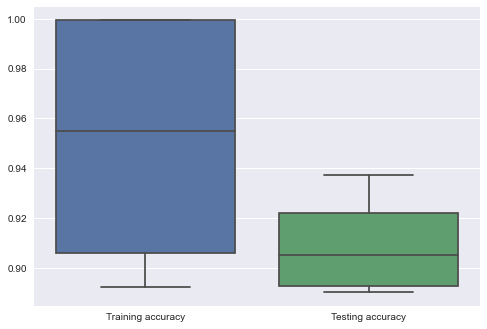

In [51]:
# Build testing accuracy boxplot analysis 
plt.style.use('seaborn')
sns.boxplot(data = box, hue_order = "models")